In [199]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns
from pandas_datareader import data
import pandas_profiling
planets = sns.load_dataset('planets')
titanic = sns.load_dataset('titanic')

In [2]:
month = np.array(list(range(1,13))*10)
amount = np.random.randint(0,100,size=month.size)

In [3]:
df = pd.DataFrame(np.c_[month, amount], columns=['month','amount'])
df.head(12)

,month,amount
0,1,71
1,2,92
2,3,94
3,4,57
4,5,42
5,6,50
6,7,20
7,8,53
8,9,18
9,10,75


In [4]:
name = np.random.choice(np.array(['A','B','C']), size=month.size)
df['name'] = name

In [5]:
df.head(12)

,month,amount,name
0,1,71,B
1,2,92,B
2,3,94,C
3,4,57,A
4,5,42,A
5,6,50,A
6,7,20,B
7,8,53,B
8,9,18,B
9,10,75,C


In [6]:
df.pivot_table('amount',index='name',columns='month').reset_index()

month,name,1,2,3,4,5,6,7,8,9,10,11,12
0,A,28.000000,61.666667,53.75,71.333333,50.500000,61.714286,29.4,28.333333,29.000000,30.800000,81.333333,10.333333
1,B,59.666667,44.250000,13.00,62.333333,89.000000,41.500000,49.5,59.600000,47.333333,37.500000,37.500000,58.000000
2,C,43.000000,33.000000,64.20,42.500000,69.333333,92.000000,68.0,80.500000,37.000000,64.666667,50.000000,58.000000


In [7]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [8]:
titanic.groupby('sex')[['survived']].sum()

,survived
sex,
female,233
male,109


In [9]:
titanic.sex.value_counts() #명목형(class) 값일 때 value_count 사용가능

male      577
female    314
Name: sex, dtype: int64

In [10]:
titanic.pclass.value_counts().index

Int64Index([3, 1, 2], dtype='int64')

In [11]:
titanic.pclass.unique()

array([3, 1, 2])

In [12]:
titanic.groupby(['sex', 'class'])['survived'].aggregate(['mean','sum','std']).unstack()

mean                       sum                    std            \
class      First    Second     Third First Second Third     First    Second   
sex                                                                           
female  0.968085  0.921053  0.500000    91     70    72  0.176716  0.271448   
male    0.368852  0.157407  0.135447    45     17    47  0.484484  0.365882   

                  
class      Third  
sex               
female  0.501745  
male    0.342694

In [13]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [14]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [15]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [16]:
pd.cut(titanic['age'], [0, 18, 35, 80]).dtype

CategoricalDtype(categories=[(0, 18], (18, 35], (35, 80]], ordered=True)

In [17]:
age = pd.cut(titanic['age'], [0, 18, 35, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 35]  0.972222  0.925000  0.500000
       (35, 80]  0.973684  0.850000  0.200000
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 35]  0.500000  0.074074  0.155844
       (35, 80]  0.318182  0.066667  0.062500

In [18]:
births = pd.read_csv('data/births.csv')

In [19]:
births.head(2)
births.describe() # 요약정보
births.columns # 열이름
births.dtypes # 데이터타입
births.isnull().sum() # 빈 데이터 확인

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [20]:
births.info() #데이터가 너무 크면 info로 정보가 안 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [21]:
# df에 decade 컬럼 만들기
births['decade'] = ((births.year // 10)*10).astype('str') + 's'

In [22]:
births.pivot_table('births', index='gender', columns='decade')

decade,1960s,1970s,1980s,1990s,2000s
gender,,,,,
F,4566.755208,4267.403569,5460.886072,162328.783333,168789.898148
M,4808.781250,4497.386393,5740.886635,170171.275000,176911.370370


In [23]:
# 'decade' column 지우기
births.drop('decade',axis=1,inplace=True)

In [24]:
# decade를 오브젝트로 만들기
decade = ((births.year // 10)*10).astype('str') + 's'

In [25]:
births.pivot_table('births', index=decade, columns='gender')

gender,F,M
year,,
1960s,4566.755208,4808.781250
1970s,4267.403569,4497.386393
1980s,5460.886072,5740.886635
1990s,162328.783333,170171.275000
2000s,168789.898148,176911.370370


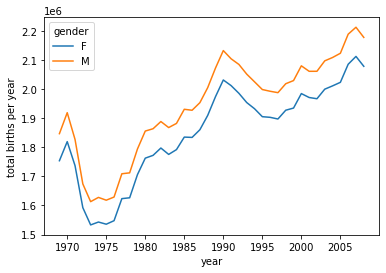

In [26]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [27]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [28]:
quartiles

array([4358. , 4814. , 5289.5])

In [29]:
mu

4814.0

In [30]:
sig

689.31

In [31]:
# 쿼리 사용
## query 메소드 안에서 @를 사용하면 변수를 그대로 사용할 수 있음
# births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
# 또는
# qry_str = '(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)'
# births = births.query(qry_str)

# loc사용
births = births.loc[(births.births > mu - 5*sig) & (births.births < mu + 5*sig),:]

In [32]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [33]:
births.day = births.day.astype('int')

In [34]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

In [35]:
births['dayofweek'] = births.index.dayofweek

In [36]:
births['decade'] = (births.year // 10)*10

<AxesSubplot:xlabel='dayofweek'>

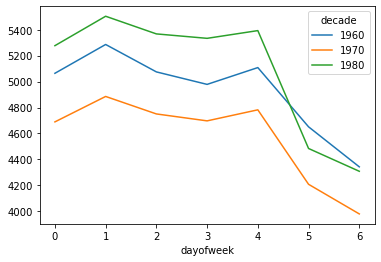

In [37]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()

In [38]:
df = pd.read_csv('data/births.csv')

In [39]:
mu = df.births.mean()
sd = df.births.std()
sig = sd * 3

In [40]:
df.loc[(df.births < (mu + sig)) & (df.births > (mu - sig)),:]
qry_str = '((births > @mu - @sig) & (births < @mu + @sig))'
cl_df = df.query(qry_str)

In [41]:
cl_df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [42]:
decade = (df.year // 10) * 10
cl_df['decade'] = decade

/tmp/ipykernel_3672/1187936965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_df['decade'] = decade


In [43]:
cl_df['day'] = cl_df['day'].astype('int')

/tmp/ipykernel_3672/4139051945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_df['day'] = cl_df['day'].astype('int')


In [44]:
# 이상치 날리기
cl_df = cl_df[~(cl_df.day > 31)]
cl_df = cl_df[~((cl_df.day > 30) & (cl_df.month.isin([2,4,6,9,11])))]
cl_df = cl_df[~((cl_df.day >= 29) & (cl_df.month == 2))]

In [45]:
time_index = pd.to_datetime(cl_df.year*10000+cl_df.month*100+cl_df.day, format='%Y%m%d')

In [46]:
cl_df.index = time_index

In [47]:
time_index

0       1969-01-01
1       1969-01-01
2       1969-01-02
3       1969-01-02
4       1969-01-03
           ...    
15062   1988-12-29
15063   1988-12-30
15064   1988-12-30
15065   1988-12-31
15066   1988-12-31
Length: 14600, dtype: datetime64[ns]

In [48]:
cl_df['dayofweek'] = cl_df.index.dayofweek

In [49]:
cl_df = cl_df.loc[cl_df.decade.isin([1970,1980,1990]),:]

In [50]:
cl_df

,year,month,day,gender,births,decade,dayofweek
1970-01-01,1970,1,1,F,4064,1970,3
1970-01-01,1970,1,1,M,4308,1970,3
1970-01-02,1970,1,2,F,4536,1970,4
1970-01-02,1970,1,2,M,4698,1970,4
1970-01-03,1970,1,3,F,4398,1970,5
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


<AxesSubplot:xlabel='dayofweek'>

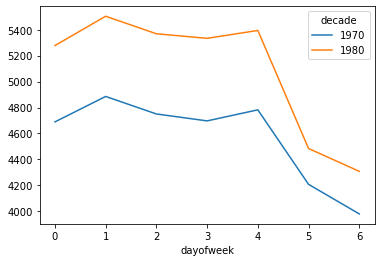

In [51]:
cl_df.pivot_table('births',index='dayofweek',columns='decade').plot()

In [52]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [53]:
planets.year.unique()

array([2006, 2008, 2011, 2007, 2009, 2002, 1996, 2010, 2001, 1995, 2004,
       2012, 2013, 2005, 2000, 2003, 1997, 1999, 2014, 1998, 1989, 1992,
       1994])

In [54]:
# 전체 연도가 index, method에 따른 mass의 sum

In [55]:
planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [56]:
planets.mass.dropna(inplace=True)

In [57]:
planets = planets[~(planets.mass.isna())]

In [58]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<AxesSubplot:xlabel='year'>

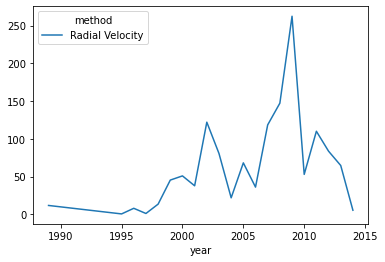

In [59]:
planets.pivot_table('mass', index='year', columns='method', aggfunc='sum').loc[:,['Radial Velocity']].plot()

In [60]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [61]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [62]:
pd.Series(data).str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

In [63]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [64]:
monte.str.upper()

0    GRAHAM CHAPMAN
1       JOHN CLEESE
2     TERRY GILLIAM
3         ERIC IDLE
4       TERRY JONES
5     MICHAEL PALIN
dtype: object

In [65]:
monte[monte.str.startswith('T')]

2    Terry Gilliam
4      Terry Jones
dtype: object

In [66]:
monte.str.split().apply(len)

0    2
1    2
2    2
3    2
4    2
5    2
dtype: int64

In [67]:
monte.str.extract('((^T)+)', expand=False)

,0,1
0,NaN,NaN
1,NaN,NaN
2,T,T
3,NaN,NaN
4,T,T
5,NaN,NaN


In [68]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [69]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [70]:
monte.str[0:3].str.upper()

0    GRA
1    JOH
2    TER
3    ERI
4    TER
5    MIC
dtype: object

In [71]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [72]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [73]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [74]:
dic = {"a": "Biden said Nato has never been more united. He urged continuing unity so sanctions would stay in place long enough to affect Moscow's decision-making",
"b": "Biden, the UK's Johnson and France's Macron all refused to say exactly how they would respond if Russia used chemical weapons in Ukraine",
"c": "Nato has confirmed that four new battlegroups comprised of 40,000 troops in total will be sent to Slovakia, Hungary, Bulgaria and Romania"}

In [75]:
sr = pd.Series(dic)
df = sr.reset_index()

In [76]:
df

,index,0
0,a,Biden said Nato has never been more united. He...
1,b,"Biden, the UK's Johnson and France's Macron al..."
2,c,Nato has confirmed that four new battlegroups ...


In [77]:
df.columns = ['docid', 'text']

In [78]:
df['text'].str.get_dummies(' ')

,"40,000",Biden,"Biden,",Bulgaria,France's,He,"Hungary,",Johnson,Macron,Moscow's,...,to,total,troops,united.,unity,urged,used,weapons,will,would
0,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,1,1,0,0,0,1
1,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,1,1,0,1
2,1,0,0,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,1,0


In [79]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [80]:
titanic = pd.read_csv('data/titanic.csv')

In [81]:
titanic[titanic.Name.str.contains('Mrs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [82]:
dt = datetime(year=2022, month=3, day=25)

In [126]:
# Time Series - 파이썬 기본 only

In [83]:
dt = datetime(year=cl_df.iloc[0,0], month=cl_df.iloc[0,1], day=cl_df.iloc[0,2])

In [85]:
dayofweek_name = []
for i in range(len(cl_df)):
    dt = datetime(year=cl_df.iloc[i,0], month=cl_df.iloc[i,1], day=cl_df.iloc[i,2])
    dayofweek_name.append(dt.strftime('%A'))

In [86]:
dayofweek_name

['Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednes

In [127]:
# Time Series - numpy 이용

In [88]:
cl_df.index

DatetimeIndex(['1970-01-01', '1970-01-01', '1970-01-02', '1970-01-02',
               '1970-01-03', '1970-01-03', '1970-01-04', '1970-01-04',
               '1970-01-05', '1970-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=13870, freq=None)

In [89]:
np.array('2022-03-25', dtype=np.datetime64)

array('2022-03-25', dtype='datetime64[D]')

In [91]:
np.datetime64('2022-03-25')

numpy.datetime64('2022-03-25')

In [93]:
np.datetime64(cl_df.index[0])

numpy.datetime64('1970-01-01T00:00:00.000000')

In [98]:
dt = cl_df.index.astype('str')

In [104]:
dt = np.array(dt,dtype=np.datetime64)

In [106]:
dt = np.datetime64('2017-01-01')

In [111]:
dt + [1,2]

array(['2017-01-02', '2017-01-03'], dtype='datetime64[D]')

In [119]:
np.datetime64('2015-07-04 12:59:59.50', 'D')

numpy.datetime64('2015-07-04')

In [128]:
# Time Series - pandas 이용

In [129]:
cl_df.index.strftime('%A')

Index(['Thursday', 'Thursday', 'Friday', 'Friday', 'Saturday', 'Saturday',
       'Sunday', 'Sunday', 'Monday', 'Monday',
       ...
       'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Thursday',
       'Friday', 'Friday', 'Saturday', 'Saturday'],
      dtype='object', length=13870)

In [130]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [142]:
date + pd.to_timedelta(np.arange(24), 'h')

DatetimeIndex(['2015-07-04 00:00:00', '2015-07-04 01:00:00',
               '2015-07-04 02:00:00', '2015-07-04 03:00:00',
               '2015-07-04 04:00:00', '2015-07-04 05:00:00',
               '2015-07-04 06:00:00', '2015-07-04 07:00:00',
               '2015-07-04 08:00:00', '2015-07-04 09:00:00',
               '2015-07-04 10:00:00', '2015-07-04 11:00:00',
               '2015-07-04 12:00:00', '2015-07-04 13:00:00',
               '2015-07-04 14:00:00', '2015-07-04 15:00:00',
               '2015-07-04 16:00:00', '2015-07-04 17:00:00',
               '2015-07-04 18:00:00', '2015-07-04 19:00:00',
               '2015-07-04 20:00:00', '2015-07-04 21:00:00',
               '2015-07-04 22:00:00', '2015-07-04 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [143]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [144]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [145]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [146]:
date = pd.to_datetime("4th of July, 2015")
date
idx = date + pd.to_timedelta(np.arange(1000), 'D')

In [149]:
amount = np.random.randint(100, size=idx.size)

In [152]:
df = pd.DataFrame({'date':idx, 'amount':amount})

In [154]:
df.set_index('date', inplace=True)

In [160]:
df['2015':'2016'].sum()

amount    27685
dtype: int64

In [167]:
idx.to_period('Y')

PeriodIndex(['2015', '2015', '2015', '2015', '2015', '2015', '2015', '2015',
             '2015', '2015',
             ...
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018'],
            dtype='period[A-DEC]', length=1000)

In [169]:
new_df = df.loc[df.amount > 30,['amount']]

In [173]:
# 최초의 31이 나온 날과 그 다음 31이 나온날의 간격
new_df

,amount
date,
2015-07-05,70
2015-07-09,63
2015-07-10,48
2015-07-11,83
2015-07-12,93
...,...
2018-03-23,52
2018-03-25,63
2018-03-26,46


In [177]:
new_df[df.amount == 31].index[0] - new_df[df.amount == 31].index[1]

/tmp/ipykernel_3672/2638626913.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[df.amount == 31].index[0] - new_df[df.amount == 31].index[1]


Timedelta('-202 days +00:00:00')

In [180]:
pd.date_range('2015-07-03', '2015-07-10', freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00',
               '2015-07-03 08:00:00', '2015-07-03 09:00:00',
               ...
               '2015-07-09 15:00:00', '2015-07-09 16:00:00',
               '2015-07-09 17:00:00', '2015-07-09 18:00:00',
               '2015-07-09 19:00:00', '2015-07-09 20:00:00',
               '2015-07-09 21:00:00', '2015-07-09 22:00:00',
               '2015-07-09 23:00:00', '2015-07-10 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [186]:
pd.date_range('2015-07-03', periods=24*60, freq='T')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 00:01:00',
               '2015-07-03 00:02:00', '2015-07-03 00:03:00',
               '2015-07-03 00:04:00', '2015-07-03 00:05:00',
               '2015-07-03 00:06:00', '2015-07-03 00:07:00',
               '2015-07-03 00:08:00', '2015-07-03 00:09:00',
               ...
               '2015-07-03 23:50:00', '2015-07-03 23:51:00',
               '2015-07-03 23:52:00', '2015-07-03 23:53:00',
               '2015-07-03 23:54:00', '2015-07-03 23:55:00',
               '2015-07-03 23:56:00', '2015-07-03 23:57:00',
               '2015-07-03 23:58:00', '2015-07-03 23:59:00'],
              dtype='datetime64[ns]', length=1440, freq='T')

In [187]:
pd.period_range('2022-03-22', periods=8, freq='B')

PeriodIndex(['2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
             '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31'],
            dtype='period[B]')

In [198]:
samsung = data.get_data_yahoo('005930.KS')

samsung.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-27,41880.0,41180.0,41200.0,41200.0,12177650.0,35753.234375
2017-03-28,41840.0,41380.0,41560.0,41480.0,8216250.0,35996.222656
2017-03-29,41960.0,41580.0,41740.0,41780.0,10093250.0,36256.554688
2017-03-30,42440.0,41880.0,41880.0,41980.0,8204000.0,36552.605469
2017-03-31,42020.0,41200.0,41820.0,41200.0,10500300.0,35873.441406
